<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Logistic_with_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from sklearn.datasets import make_classification
import numpy as np
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,\
                      n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [34]:
import matplotlib.pyplot as plt

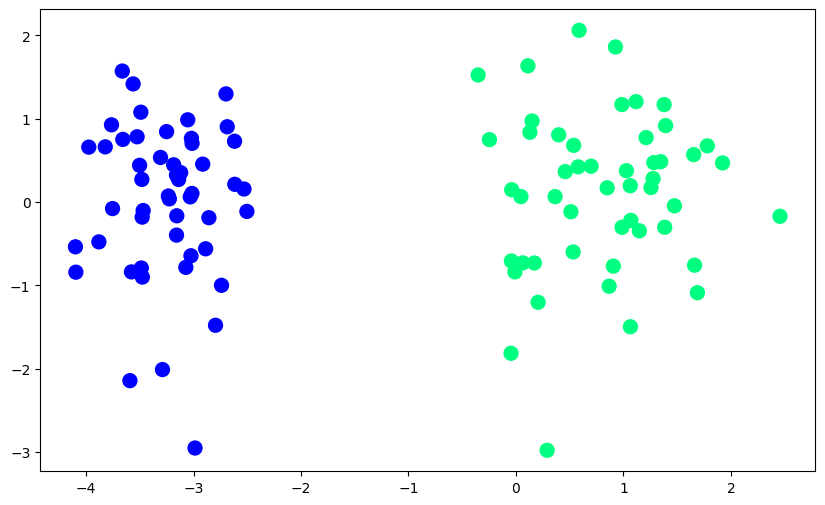

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [36]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [37]:
print(lor.coef_)
print(lor.intercept_)

[[4.82929097 0.21798171]]
[5.80038318]


In [38]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [39]:
x_input = np.linspace(-3,3,100)
y_output = m*x_input+ b

In [40]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

In [41]:
def gd(x,y):
  x = np.insert(x,0,1,axis =1 )
  weights = np.ones(x.shape[1])
  lr = .5

  for i in range(5000):
    y_hat = sigmoid(np.dot(x,weights))
    weights = weights + lr*(np.dot((y - y_hat),x))/x.shape[0]
  return weights[0] ,weights[1:]

In [42]:
intercept,coef = gd(x,y)

In [43]:
intercept

np.float64(5.83338864905325)

In [44]:
coef

array([4.83926872, 0.21182255])

In [45]:
m = -(coef[0]/coef[1])
b = -(intercept/coef[1])

In [46]:
# x_input = np.linspace(-3,3,100)
y_output1 = m*x_input+ b

(-3.0, 2.0)

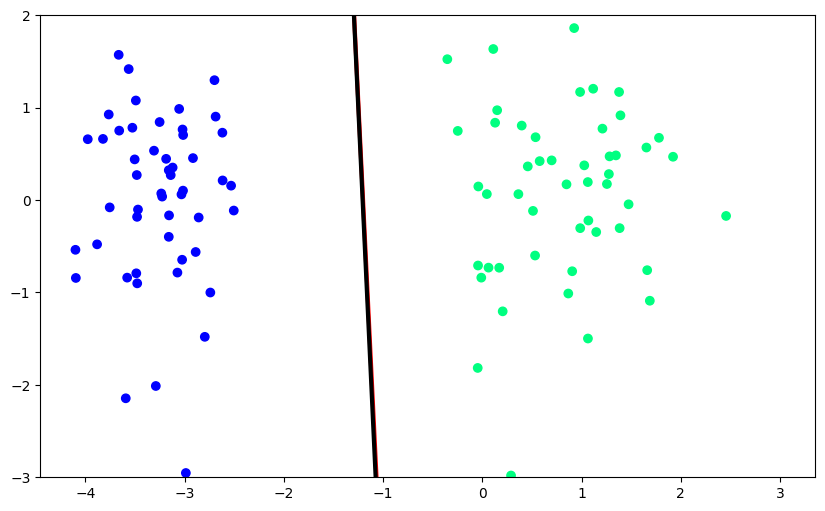

In [48]:

plt.figure(figsize=(10,6))
plt.plot(x_input,y_output, color = 'red', linewidth = 3)
plt.plot(x_input,y_output1, color = 'black', linewidth = 3)
plt.scatter(x[:,0],x[:,1],c = y , cmap = 'winter')
plt.ylim(-3,2)